<a href="https://colab.research.google.com/github/aeleneibogdan/StarWarsImageClassification/blob/main/StarWars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing kaggle.

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Importing libs


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import os 
import zipfile
import io   
import pathlib

In [ ]:
#adding tensorflow to GPU as hardware accelerator
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-60f0b88c-1afb-94df-10c1-c535a6a81d40)


In [ ]:
! kaggle datasets download -d mathurinache/star-wars-images

star-wars-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip -uq "star-wars-images" -d "/content/dataset/"
datasetDirectory = pathlib.Path("/content/dataset/")

In [ ]:
imageCounter = len(list(datasetDirectory.glob('*/*.jpg')))
print(datasetDirectory)
print(imageCounter)

/content/dataset
4183


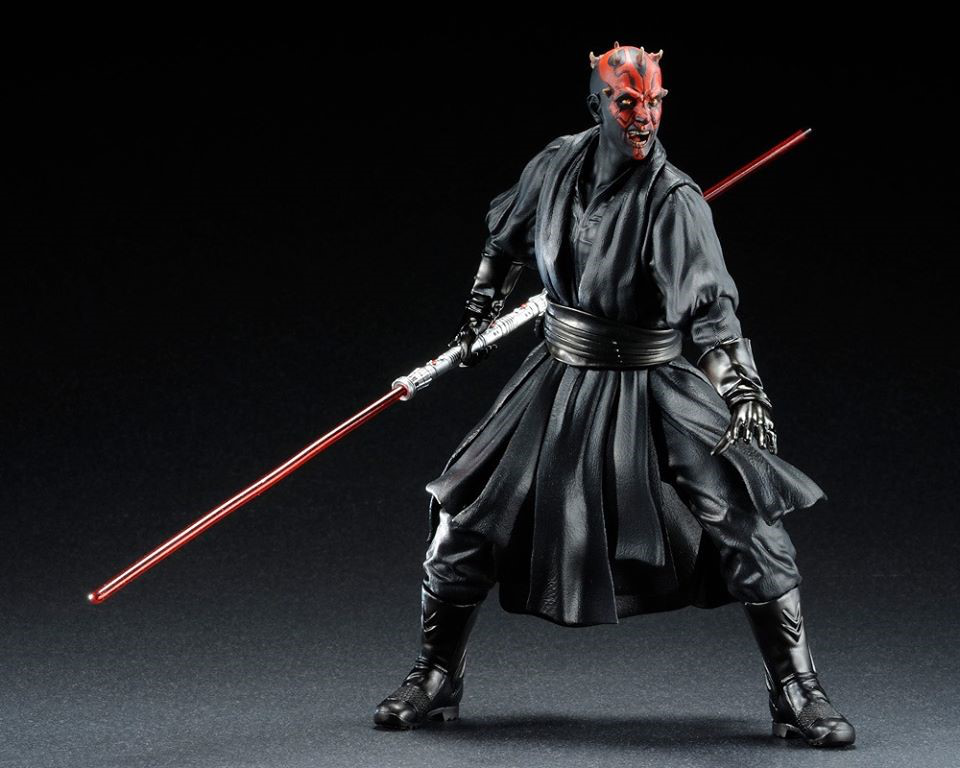

In [ ]:
DarthMaul = list(datasetDirectory.glob('Darth Maul/*'))
PIL.Image.open(str(DarthMaul[11]))

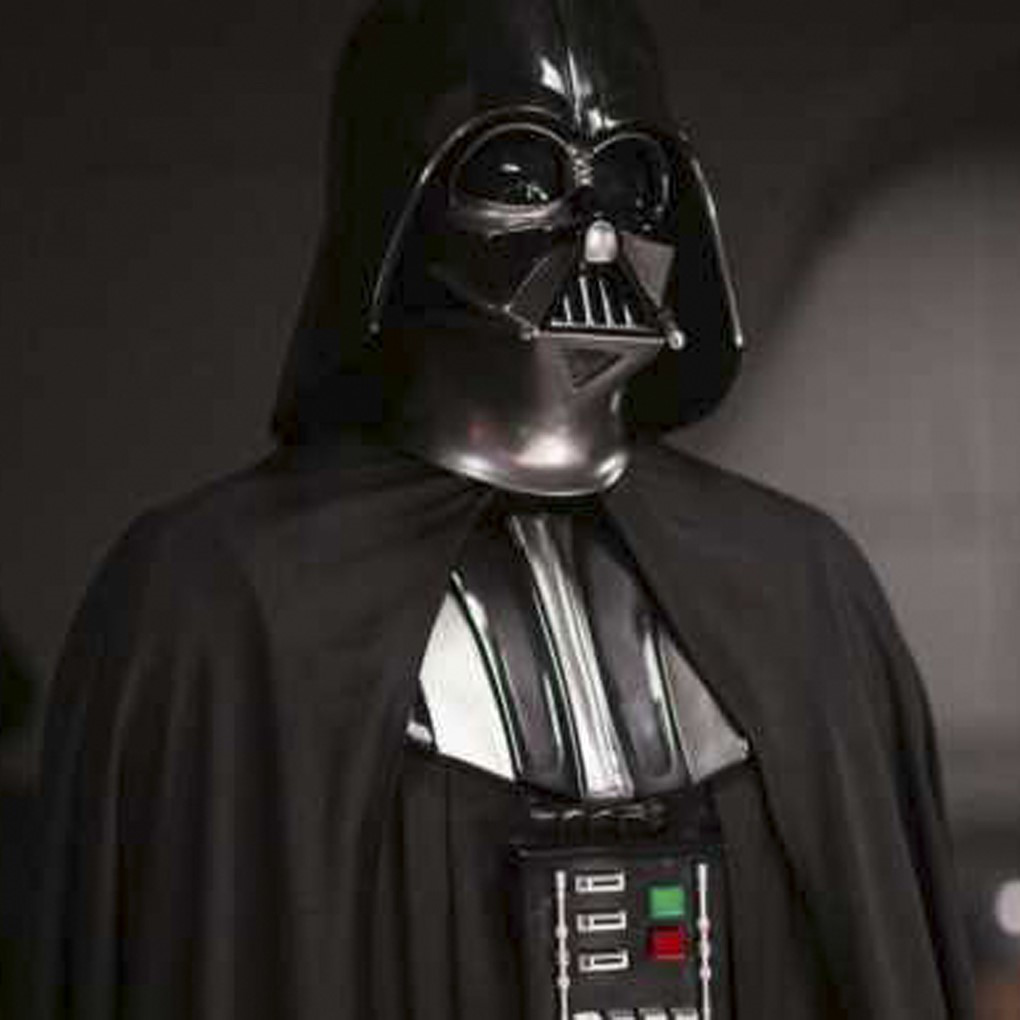

In [ ]:
DarthVader = list(datasetDirectory.glob('Darth Vader/*'))
PIL.Image.open(str(DarthVader[20]))

In [ ]:
trainingDataset = keras.utils.image_dataset_from_directory(
    datasetDirectory,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64, 64)
)

Found 4727 files belonging to 51 classes.
Using 3782 files for training.


In [ ]:
validationDataset = keras.utils.image_dataset_from_directory (
    datasetDirectory,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (64, 64)
)

Found 4727 files belonging to 51 classes.
Using 945 files for validation.


In [ ]:
classes = trainingDataset.class_names
print(classes)

['Admiral Ackbar', 'Admiral Piett', 'Anakin Skywalker', 'BB-8', 'Bail Organa', 'Bib Fortuna', 'Boba Fett', 'Bodhi Rook', 'C-3PO', 'Captain Phasma', 'Cassian Andor', 'Chewbacca', 'Dark Sidious', 'Darth Maul', 'Darth Vader', 'Finn (FN-2187)', 'General Grievous', 'General Hux', 'Grand Moff Tarkin', 'Greedo', 'Han Solo', 'Jabba the Hutt', 'Jango Fett', 'Jar Jar Binks', 'Jyn Erso', 'K-2SO', 'Kenobi', 'Kylo Ren', 'Lando Calrissian', 'Luke Skywalker', 'Mace Windu', 'Maz Kanata', 'Nien Nunb', 'Obi-Wan', 'Orson Krennic', 'Padm├й Amidala', 'Poe Dameron', 'Princess Leia Organa', "Qi'ra", 'Qui-Gon Jinn', 'R2-D2', 'Rey', 'Rose Tico', 'Saw Gerrera', 'Supreme Leader Snoke', 'Tobias Beckett', 'Vice-Admiral Holdo', 'Watto', 'Wedge Antilles', 'Wicket W. Warrick', 'Yoda']


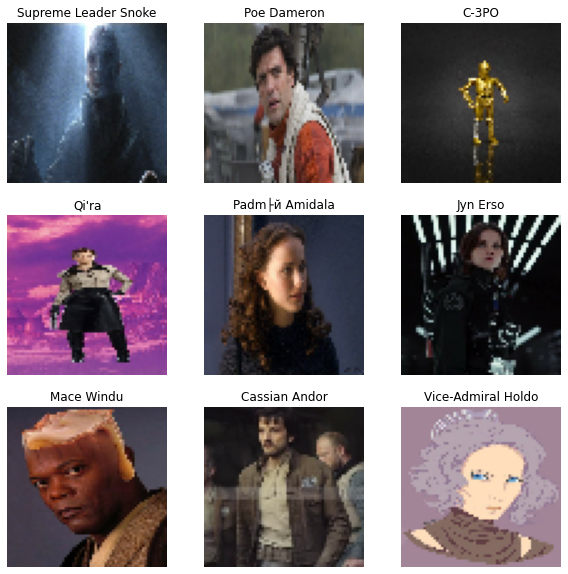

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in trainingDataset.take(1):
  for i in range(9):
    axe = plt.subplot(3, 3 , i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

CNN


In [ ]:
classesNumber = len(classes)

model = keras.models.Sequential([
              keras.layers.Rescaling(1./255, input_shape=(64, 64, 3)),
              keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
              keras.layers.MaxPooling2D(),
              keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
              keras.layers.MaxPooling2D(),
              keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
              keras.layers.MaxPooling2D(),
              keras.layers.Dropout(0.5),
              keras.layers.Flatten(),
              keras.layers.Dense(128, activation='relu'),
                ])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10 
cnn = model.fit(trainingDataset, validation_data = validationDataset, epochs = epochs)

Epoch 1/10
119/119 [==============================] - 37s 292ms/step - loss: 4.7933 - accuracy: 0.0264 - val_loss: 4.7866 - val_accuracy: 0.0328
Epoch 2/10
119/119 [==============================] - 36s 293ms/step - loss: 4.7484 - accuracy: 0.0473 - val_loss: 4.7205 - val_accuracy: 0.0593
Epoch 3/10
119/119 [==============================] - 36s 286ms/step - loss: 4.6574 - accuracy: 0.0791 - val_loss: 4.6741 - val_accuracy: 0.0741
Epoch 4/10
119/119 [==============================] - 36s 287ms/step - loss: 4.5650 - accuracy: 0.1074 - val_loss: 4.6032 - val_accuracy: 0.0952
Epoch 5/10
119/119 [==============================] - 39s 319ms/step - loss: 4.4833 - accuracy: 0.1243 - val_loss: 4.5691 - val_accuracy: 0.1037
Epoch 6/10
119/119 [==============================] - 35s 280ms/step - loss: 4.4063 - accuracy: 0.1446 - val_loss: 4.5488 - val_accuracy: 0.1132
Epoch 7/10
119/119 [==============================] - 36s 285ms/step - loss: 4.3658 - accuracy: 0.1523 - val_loss: 4.5269 - val_ac

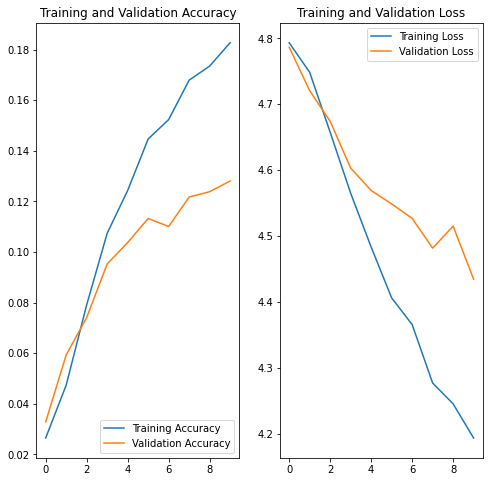

In [ ]:
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']

loss = cnn.history['loss']
val_loss = cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()